## 1. tensorflow v2.x 에서 v1 사용하기

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#v1로 사용하기

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [3]:
#sess.close()
sess1=tf.Session()

In [4]:
print(sess.run(node1))

b'Hello, Tensorflow'


In [5]:
print(sess1.run(node1))

b'Hello, Tensorflow'


In [6]:
# 간단한 수학 연산 수행(graph)
node1 = tf.constant(110, dtype=tf.float32)
node2 = tf.constant(120, dtype=tf.float32)
node3 = tf.add(node1, node2)
print(sess.run(node3))

230.0


In [7]:
tf.Session().run(node1)

110.0

### Tensorflow
- 그래프정의
- sess = tf.Session()를 실행
- sess.run()을 통해 값을 확인할 수 있음

In [8]:
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
print(sess.run([node2,node1]))

[array([1., 2., 3.], dtype=float32), array([1, 2, 3], dtype=int16)]


In [9]:
data = np.array([1.,2.,3.,4.])
m=tf.reduce_mean(data) #reduce_mean : 평균값을 계산
sess= tf.Session()
print(sess.run(m))

2.5


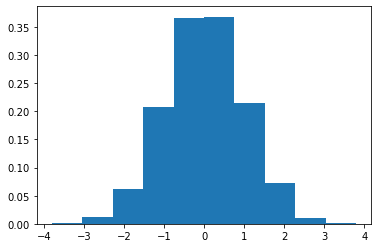

In [10]:
import matplotlib.pyplot as plt
tensor = tf.random_normal([10000]) #random_normal : 평균0이고 표준편차가 1인 난수
sess =tf.Session()
plt.hist(sess.run(tensor), density=True)
plt.show()

In [11]:
print(sess.run(tf.reduce_mean(tensor)))

0.0010912825


## 2. tensorflow v1을 이용한 linear regression을 구현

### 독립변수 x가 한개

In [12]:
# tensor graph 정의
# data set
x = np.array([1,2,3])
y = np.array([1,2,3])
# Weight와 Bias (처음에는 랜덤값을 세팅했다가 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis
H =W*x+b
# cost function(최소 제곰법)
cost = tf.reduce_mean(tf.square(H-y))
# 우리의 목적인 cost가 최소가 되는 W와 b를 찾는 것
'''
cost함수는 제곱의 평균인 2차함수이므로 곡선. 곡선 위 미분값이 줄어드는 방향으로 학습
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#Session
sess= tf.Session()
#Variable 노드 (W, b) 초기화
sess.run(tf.global_variables_initializer())

# 6000번 학습 (v2에서는 fit함수)
# for step in range(1,6001):
#     sess.run(train)
#     if step%300==0:
#         print("{}번째 학습시 cost:{}, W값:{}, b값:{}".format(step, sess.run(cost), sess.run(W), sess.run(b)))
        
for step in range(1,6001):
    _, cost_val, W_val, b_val=sess.run([train, cost, W, b])
    if step%300==0:
        print("{}번째 학습시 cost:{}, W값:{}, b값:{}".format(step, cost_val, W_val, b_val))

300번째 학습시 cost:0.02581273950636387, W값:[0.81384796], b값:[0.42316732]
600번째 학습시 cost:0.00609075790271163, W값:[0.90957546], b값:[0.20555626]
900번째 학습시 cost:0.0014371724100783467, W값:[0.95607567], b값:[0.09985032]
1200번째 학습시 cost:0.0003391131467651576, W값:[0.9786635], b값:[0.04850295]
1500번째 학습시 cost:8.001918467925861e-05, W값:[0.9896354], b값:[0.02356087]
1800번째 학습시 cost:1.888131009764038e-05, W값:[0.9949654], b값:[0.01144491]
2100번째 학습시 cost:4.455227553989971e-06, W값:[0.9975544], b값:[0.00555938]
2400번째 학습시 cost:1.0512867447687313e-06, W값:[0.99881196], b값:[0.00270055]
2700번째 학습시 cost:2.4818675115056976e-07, W값:[0.9994227], b값:[0.00131214]
3000번째 학습시 cost:5.8687422921366306e-08, W값:[0.99971926], b값:[0.00063801]
3300번째 학습시 cost:1.3916721108842012e-08, W값:[0.9998634], b값:[0.00031063]
3600번째 학습시 cost:3.305756335336696e-09, W값:[0.9999334], b값:[0.00015152]
3900번째 학습시 cost:7.884886632503196e-10, W값:[0.9999674], b값:[7.3857605e-05]
4200번째 학습시 cost:1.856051978776918e-10, W값:[0.99998426], b값:[3.5911842e-0

In [13]:
sess.run([W,b])

[array([0.99999774], dtype=float32), array([4.490333e-06], dtype=float32)]

In [14]:
W_, b_ = sess.run([W,b])

In [15]:
print(W_[0],b_[0])

0.99999774 4.490333e-06


In [16]:
type(H)

tensorflow.python.framework.ops.Tensor

In [17]:
# tensor graph 정의
x=[1,2,3]
y=[1,2,3]
# Weight와 Bias
W = tf.Variable(100.0, name="weight")
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis
H=W*x+b
# cost(최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# session
sess = tf.Session()
# b노드 초기화
sess.run(tf.global_variables_initializer())
# 4000번 학습
for step in range(1,4001):
    cost_val, W_val, b_val = sess.run([cost,W,b])
    if step%100==1 :
        print("{}번쨰 cost : {}, W : {}, b : {}".format(step, cost_val, W_val, b_val))
    sess.run(train)

1번쨰 cost : 45893.76171875, W : 100.0, b : [0.392949]
101번쨰 cost : 115.9096908569336, W : 13.504847526550293, b : [-28.424694]
201번쨰 cost : 71.6250991821289, W : 10.829434394836426, b : [-22.344616]
301번쨰 cost : 44.259952545166016, W : 8.72683048248291, b : [-17.564903]
401번쨰 cost : 27.349952697753906, W : 7.07399320602417, b : [-13.807612]
501번쨰 cost : 16.900615692138672, W : 5.774713039398193, b : [-10.854044]
601번쨰 cost : 10.443562507629395, W : 4.753360271453857, b : [-8.532271]
701번쨰 cost : 6.453489780426025, W : 3.950484275817871, b : [-6.707144]
801번쨰 cost : 3.987863302230835, W : 3.3193485736846924, b : [-5.272425]
901번쨰 cost : 2.464256525039673, W : 2.8232192993164062, b : [-4.144606]
1001번쨰 cost : 1.5227603912353516, W : 2.433216094970703, b : [-3.2580376]
1101번쨰 cost : 0.9409739375114441, W : 2.126638889312744, b : [-2.561115]
1201번쨰 cost : 0.5814647674560547, W : 1.8856407403945923, b : [-2.01327]
1301번쨰 cost : 0.3593098223209381, W : 1.6961945295333862, b : [-1.5826135]
140

### 2.2 predict를 하기 위한 placeholder 이용

In [18]:
# placeholder 이용
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
ab = a+b
sess = tf.Session()
sess.run(ab, feed_dict={a:10, b:20})

30.0

In [19]:
sess.run(a, feed_dict={a:[1,2,3]})

array([1., 2., 3.], dtype=float32)

In [20]:
sess.run(ab, feed_dict={a:np.array([10,20,30]),
                       b:np.array([1,2,3])})

array([11., 22., 33.], dtype=float32)

In [21]:
# data set (H = 2x + 3)
x_data = [1,2,3]
y_data = [5,7,9]

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
H = W*x+b

# cost function
cost = tf.reduce_mean(tf.square(H-y))

#경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x:x_data, y:y_data})
    if step%200==0:
        print("{}번쨰 cost : {}, W : {}, b : {}".format(step, cost_val, W_val, b_val))

200번쨰 cost : 0.5720560550689697, W : [2.876335], b : [1.007885]
400번쨰 cost : 0.21843957901000977, W : [2.5415223], b : [1.768993]
600번쨰 cost : 0.08341100066900253, W : [2.3346279], b : [2.2393122]
800번쨰 cost : 0.03185036778450012, W : [2.20678], b : [2.5299408]
1000번쨰 cost : 0.01216204185038805, W : [2.1277773], b : [2.709532]
1200번쨰 cost : 0.00464400602504611, W : [2.078958], b : [2.8205092]
1400번쨰 cost : 0.0017733311979100108, W : [2.0487914], b : [2.8890855]
1600번쨰 cost : 0.0006771272164769471, W : [2.03015], b : [2.9314618]
1800번쨰 cost : 0.00025857469881884754, W : [2.018631], b : [2.9576468]
2000번쨰 cost : 9.8733878985513e-05, W : [2.0115128], b : [2.9738288]
2200번쨰 cost : 3.77056458091829e-05, W : [2.0071146], b : [2.983827]
2400번쨰 cost : 1.4398146049643401e-05, W : [2.0043967], b : [2.9900053]
2600번쨰 cost : 5.500347469933331e-06, W : [2.0027173], b : [2.993823]
2800번쨰 cost : 2.1029247818660224e-06, W : [2.0016804], b : [2.9961812]
3000번쨰 cost : 8.048173185670748e-07, W : [2.00103

In [22]:
sess.run([W,b])

[array([2.000026], dtype=float32), array([2.999942], dtype=float32)]

In [23]:
# 예측해 보기
sess.run(H,feed_dict={x:np.array([5,7])})

array([13.000072, 17.000124], dtype=float32)

### 2.3 scale이 다른 데이터들의 linear regression을 구현

In [24]:
#이렇게 하면 안됨
x_data = [1,2,5,8,10]
y_data = [5,15,68,80,95]

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
H = W*x+b

# cost function
cost = tf.reduce_mean(tf.square(H-y))

#경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x:x_data, y:y_data})
    if step%200==0:
        print("{}번쨰 cost : {}, W : {}, b : {}".format(step, cost_val, W_val, b_val))

200번쨰 cost : 79.17955780029297, W : [10.111038], b : [0.13022931]
400번쨰 cost : 79.14315032958984, W : [10.145075], b : [-0.12179032]
600번쨰 cost : 79.13977813720703, W : [10.155385], b : [-0.1981254]
800번쨰 cost : 79.1395034790039, W : [10.158506], b : [-0.22124675]
1000번쨰 cost : 79.13944244384766, W : [10.159453], b : [-0.22824912]
1200번쨰 cost : 79.13948059082031, W : [10.1597395], b : [-0.23037018]
1400번쨰 cost : 79.13945007324219, W : [10.159826], b : [-0.23101318]
1600번쨰 cost : 79.13944244384766, W : [10.159853], b : [-0.23120616]
1800번쨰 cost : 79.13948059082031, W : [10.15986], b : [-0.23126489]
2000번쨰 cost : 79.13947296142578, W : [10.159862], b : [-0.23128039]
2200번쨰 cost : 79.13946533203125, W : [10.1598625], b : [-0.23128368]
2400번쨰 cost : 79.13946533203125, W : [10.1598625], b : [-0.23128368]
2600번쨰 cost : 79.13946533203125, W : [10.1598625], b : [-0.23128368]
2800번쨰 cost : 79.13946533203125, W : [10.1598625], b : [-0.23128368]
3000번쨰 cost : 79.13946533203125, W : [10.1598625], 

In [25]:
#예측이 안 되는 이유 : GradientDescentOptimier에서 local최소값을 만나면 멈춤(global 최소값이 따로 있다고 해도)

In [26]:
#컴퓨터를 on한 후에
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

## 3. 독립변수 x가 여러 개인 linear regression
- 교안 pt. 25

In [33]:
# data set
x_data = np.array([[73,80,75],[93,88,93],[89,91,90],[96,98,100],[73,66,70]])
y_data = np.array([[152],[185],[180],[196],[142]])

# tensor graph 정의
# placeholder
X = tf.placeholder(shape = [None,3], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

# Weight & bias (weight 3개, bias 1개)
W = tf.Variable(tf.random_normal([3,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# Hypothesis
#H = X @ W + b
H = tf.matmul(X,W) + b

# cost
cost = tf.reduce_mean(tf.square(H-Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data, Y : y_data})
    if step % 300 == 1 :
        print("{}번째 cost : {}".format(step, cost_val))


1번째 cost : 2.396723747253418
301번째 cost : 0.7442036271095276
601번째 cost : 0.7307403683662415
901번째 cost : 0.7182663083076477
1201번째 cost : 0.706680953502655
1501번째 cost : 0.6958528757095337
1801번째 cost : 0.6856766939163208
2101번째 cost : 0.6760711669921875
2401번째 cost : 0.6669645309448242
2701번째 cost : 0.6583072543144226
3001번째 cost : 0.6500355005264282
3301번째 cost : 0.6420927047729492
3601번째 cost : 0.634466290473938
3901번째 cost : 0.6271037459373474
4201번째 cost : 0.6200004816055298
4501번째 cost : 0.6130997538566589
4801번째 cost : 0.6063944101333618
5101번째 cost : 0.5998837351799011
5401번째 cost : 0.593518853187561
5701번째 cost : 0.5873169302940369


In [34]:
#예측해보기
sess.run(H, feed_dict={X:np.array([[73,80,72]])})

array([[152.2114]], dtype=float32)

## 4. Ozone량 예측 예제(scale 조정 필요)
- 독립변수 x가 3개
- Multi-variable Linear Regression

In [43]:
#data = np.loadtxt('./data/ozone.csv', delimiter=',') #헤더 NA때문에 사용불가
data = pd.read_csv('./data/ozone.csv')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [77]:
#data = np.loadtxt('./data/ozone.csv', delimiter=',') #헤더 NA때문에 사용불가
data = pd.read_csv('./data/ozone.csv')
# ML이나 DL에서는 결측치 정제 작업 필요
data=data.dropna(how='any', axis=0) # 결측치가 한 열이라도 있는 행 삭제
# 필요한 독립변수, 종속변수 추출
data = data[['Ozone','Solar.R','Wind','Temp']]
# x_data = np.array(data[['Solar.R','Wind','Temp']])
x_data = data[['Solar.R','Wind','Temp']].values
# y_data = data['Ozone'].values.reshape(-1,1)
y_data = data[['Ozone']].values
x_data.shape, y_data.shape
# tensorflow 구현
# 1. X, Y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. weight, bias
W=tf.Variable(tf.random_normal([3,1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')
# 3. Hypothesis
H = tf.matmul(X, W) + b
# 4. cost 함수
cost = tf.reduce_mean(tf.square(H-Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(cost)
# 6. Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 7. 학습
for step in range(1,6001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step % 300 == 1:
        print("{}번째 cost : {}".format(step, cost_val))

1번째 cost : 9102.2626953125
301번째 cost : nan
601번째 cost : nan
901번째 cost : nan
1201번째 cost : nan
1501번째 cost : nan
1801번째 cost : nan
2101번째 cost : nan
2401번째 cost : nan
2701번째 cost : nan
3001번째 cost : nan
3301번째 cost : nan
3601번째 cost : nan
3901번째 cost : nan
4201번째 cost : nan
4501번째 cost : nan
4801번째 cost : nan
5101번째 cost : nan
5401번째 cost : nan
5701번째 cost : nan


In [60]:
data[1:2]

,Ozone,Solar.R,Wind,Temp
1,36.0,118.0,8.0,72


In [61]:
sess.run(H, feed_dict={X:np.array([[118,8,72]])})

array([[41.388344]], dtype=float32)

In [63]:
# scale 맞추는 방법 : normalization(정규화), standardization(표준화)
                        # 평균이 0, 표준편차 1
#                        X-X.min
# normalization = --------------------- (정규화 공식)
#                       X.max-X.min
# 위의 식을 써도 되지만 라이브러리를 씀 (sklearn.preprocessing.MinMaxScaler 이용)
#                        X-X.mean
# standardiztion = -------------------- (표준화 공식)
#                        X.std
# 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.StandardScaler 이용)

In [69]:
# standardization(표준화)

#data = np.loadtxt('./data/ozone.csv', delimiter=',') #헤더 NA때문에 사용불가
data = pd.read_csv('./data/ozone.csv')
# ML이나 DL에서는 결측치 정제 작업 필요
data=data.dropna(how='any', axis=0) # 결측치가 한 열이라도 있는 행 삭제
# 필요한 독립변수, 종속변수 추출
data = data[['Ozone','Solar.R','Wind','Temp']]
#data.apply(lambda x : (x-x.mean())/x.std())
data['Ozone'] = (data['Ozone'] - data['Ozone'].mean())/data['Ozone'].std()
data['Solar.R'] = (data['Solar.R'] - data['Solar.R'].mean())/data['Solar.R'].std()
data['Wind'] = (data['Wind'] - data['Wind'].mean())/data['Wind'].std()
data['Temp'] = (data['Temp'] - data['Temp'].mean())/data['Temp'].std()
# x_data = np.array(data[['Solar.R','Wind','Temp']])
x_data = data[['Solar.R','Wind','Temp']].values
# y_data = data['Ozone'].values.reshape(-1,1)
y_data = data[['Ozone']].values

# tensorflow 구현
# 1. X, Y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. weight, bias
W=tf.Variable(tf.random_normal([3,1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')
# 3. Hypothesis
H = tf.matmul(X, W) + b
# 4. cost 함수
cost = tf.reduce_mean(tf.square(H-Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(cost)
# 6. Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 7. 학습
for step in range(1,6001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step % 300 == 1:
        print("{}번째 cost : {}".format(step, cost_val))

1번째 cost : 30.794574737548828
301번째 cost : 0.3963316082954407
601번째 cost : 0.39057549834251404
901번째 cost : 0.3905549645423889
1201번째 cost : 0.39055493474006653
1501번째 cost : 0.39055490493774414
1801번째 cost : 0.39055490493774414
2101번째 cost : 0.39055490493774414
2401번째 cost : 0.39055490493774414
2701번째 cost : 0.39055490493774414
3001번째 cost : 0.39055490493774414
3301번째 cost : 0.39055490493774414
3601번째 cost : 0.39055490493774414
3901번째 cost : 0.39055490493774414
4201번째 cost : 0.39055490493774414
4501번째 cost : 0.39055490493774414
4801번째 cost : 0.39055490493774414
5101번째 cost : 0.39055490493774414
5401번째 cost : 0.39055490493774414
5701번째 cost : 0.39055490493774414


In [89]:
# standardization(표준화) API 사용

#data = np.loadtxt('./data/ozone.csv', delimiter=',') #헤더 NA때문에 사용불가
data = pd.read_csv('./data/ozone.csv')
# ML이나 DL에서는 결측치 정제 작업 필요
data=data.dropna(how='any', axis=0) # 결측치가 한 열이라도 있는 행 삭제
# 필요한 독립변수, 종속변수 추출
data = data[['Ozone','Solar.R','Wind','Temp']]
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(data)
# data = pd.DataFrame(scaler.transform(data), columns=['Ozone','Solar.R','Wind','Temp'])


# x_data = np.array(data[['Solar.R','Wind','Temp']])
x_data = data[['Solar.R','Wind','Temp']].values
y_data = data[['Ozone']].values
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_x.fit(x_data)
x_data = scaler_x.transform(x_data)
# x_data = scaler_x.fit_transform(x_data)

scaler_y = StandardScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)
# scale 조정된 데이터를 다시 원데이터로 해석
# original_x = scaler_x.inverse_transform(x_data)
# original_y = scaler_y.inverse_transform(y_data)

# tensorflow 구현
# 1. X, Y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. weight, bias
W=tf.Variable(tf.random_normal([3,1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')
# 3. Hypothesis
H = tf.matmul(X, W) + b
# 4. cost 함수
cost = tf.reduce_mean(tf.square(H-Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(cost)
# 6. Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 7. 학습
for step in range(1,6001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step % 300 == 1:
        print("{}번째 cost : {}".format(step, cost_val))

1번째 cost : 9.378368377685547
301번째 cost : 0.39849165081977844
601번째 cost : 0.39412012696266174
901번째 cost : 0.3941054344177246
1201번째 cost : 0.3941054046154022
1501번째 cost : 0.39410537481307983
1801번째 cost : 0.39410537481307983
2101번째 cost : 0.39410537481307983
2401번째 cost : 0.39410537481307983
2701번째 cost : 0.39410537481307983
3001번째 cost : 0.39410537481307983
3301번째 cost : 0.39410537481307983
3601번째 cost : 0.39410537481307983
3901번째 cost : 0.39410537481307983
4201번째 cost : 0.39410537481307983
4501번째 cost : 0.39410537481307983
4801번째 cost : 0.39410537481307983
5101번째 cost : 0.39410537481307983
5401번째 cost : 0.39410537481307983
5701번째 cost : 0.39410537481307983


In [87]:
input_data=np.array([[118,8,72]])
scaled_input_data = scaler_x.transform(input_data)
scaled_input_data

array([[-0.73618283, -0.54766534, -0.61060682]])

In [88]:
sess.run(H, feed_dict={X:scaled_input_data})

array([[-0.21434522]], dtype=float32)

In [95]:
# Normalization(정규화, 많이 씀)
data = pd.read_csv('./data/ozone.csv')
data=data.dropna(how='any', axis=0)
data = data[['Ozone','Solar.R','Wind','Temp']]
x_data = data[['Solar.R','Wind','Temp']].values
y_data = data[['Ozone']].values
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_x.fit(x_data)
x_data = scaler_x.transform(x_data)
scaler_y = StandardScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)
# tensorflow 구현
# 1. X, Y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. weight, bias
W=tf.Variable(tf.random_normal([3,1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')
# 3. Hypothesis
H = tf.matmul(X, W) + b
# 4. cost 함수
cost = tf.reduce_mean(tf.square(H-Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# 6. Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 7. 학습
for step in range(1,6001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step % 300 == 1:
        print("{}번째 cost : {}".format(step, cost_val))

1번째 cost : 4.506444931030273
301번째 cost : 1.0141665935516357
601번째 cost : 0.6540743112564087
901번째 cost : 0.5052369832992554
1201번째 cost : 0.4426962733268738
1501번째 cost : 0.4158934950828552
1801번째 cost : 0.40414267778396606
2101번째 cost : 0.3988598585128784
2401번째 cost : 0.3964208960533142
2701번째 cost : 0.39526426792144775
3001번째 cost : 0.39470118284225464
3301번째 cost : 0.39442023634910583
3601번째 cost : 0.3942767381668091
3901번째 cost : 0.39420175552368164
4201번째 cost : 0.3941617012023926
4501번째 cost : 0.39413973689079285
4801번째 cost : 0.39412739872932434
5101번째 cost : 0.3941202163696289
5401번째 cost : 0.3941158354282379
5701번째 cost : 0.39411306381225586


In [98]:
# 8. 예측 (모델 사용해 보기)
input_data = np.array([[118,8,72]])
scaled_input_data = scaler_x.transform(input_data)
predict_value = sess.run(H, feed_dict={X:scaled_input_data})
scaler_y.inverse_transform(predict_value)

array([[34.897167]], dtype=float32)

## 5. logistic Regression ( = Binary classification)
- logistic Regression은 기존의 linear Regression과 다르게 처리

W값 :  0.12925170068027214 b값 :  -0.27210884353741516


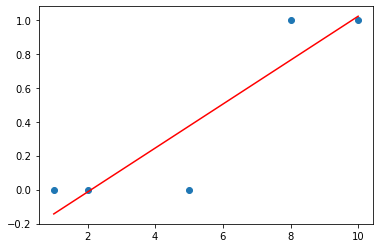

In [101]:
from scipy import stats
x = np.array([1,2,5,8,10])
y = np.array([0,0,0,1,1])
lm = stats.linregress(x,y)
print('W값 : ',lm[0], 'b값 : ', lm[1])
plt.scatter(x,y)
plt.plot(x,x*lm[0]+lm[1],'r')

W값 :  0.03500583430571762 b값 :  0.1732788798133022


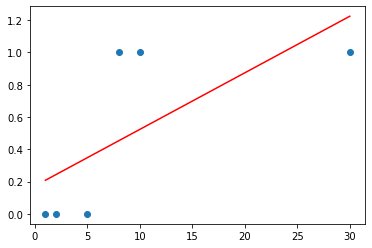

In [102]:
x = np.array([1,2,5,8,10,30])
y = np.array([0,0,0,1,1,1])
lm = stats.linregress(x,y)
print('W값 : ',lm[0], 'b값 : ', lm[1])
plt.scatter(x,y)
plt.plot(x,x*lm[0]+lm[1],'r')

In [119]:
# 교안 pt.50
x_data = np.array([[10,0],[8,1],[3,3],[2,3],[5,1],[2,0],[1,0]])
y_data = np.array([[1],[1],[1],[1],[0],[0],[0]])
# X,Y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
# Hypothesis
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)
# cost 함수
# cost = tf.reduce_mean(tf.square(H-Y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(1,120002):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step % 30000 == 1:
        print("{}번째 cost : {}".format(step, cost_val))
#accuracy
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
# sess.run(correct, feed_dict={X:x_data, Y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 : ", sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

1번째 cost : 3.583415985107422
30001번째 cost : 0.020138978958129883
60001번째 cost : 0.01024588756263256
90001번째 cost : 0.006866990588605404
정확도 :  1.0


In [121]:
# 예측(모델 사용하기)
print('H결과: ',sess.run(H,feed_dict={X:[[5,1],[11,0],[0,8],[5,5],[2,1],[2,2]]}))
print('predict결과: ',sess.run(predict,feed_dict={X:[[5,1]]}))

H결과:  [[2.0126998e-02]
 [9.9980521e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.6884692e-07]
 [6.2411129e-03]]
predict결과:  [[0.]]


## 6.multinomial classfication(3개 이상 그룹)
- 교안 pt. 54 퀴즈1,2,3성적과 출석에 따른 ABC등급 분류

In [126]:
x_data=np.array([[10,7,8,5],[8,8,9,4],[7,8,2,3],[6,3,9,3],[7,5,7,4],[3,5,6,2],[2,4,3,1]])
# 종속변수가 다중분류이면 원핫인코딩 해야 함.

# 원핫인코딩 방법1
y_data=np.array([['A'],['A'],['B'],['B'],['B'],['C'],['C']])
from tensorflow.keras.utils import to_categorical
# to_categorical(y_data) #에러
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# encoder.fit(y_data)
# y_data = encoder.transform(y_data)
y_data = encoder.fit_transform(y_data)
y_data = to_categorical(y_data)

# 원핫인코딩 방법2
y_data=np.array([['A'],['A'],['B'],['B'],['B'],['C'],['C']])
from sklearn.preprocessing import LabelEncoder
import pandas as pd
encoder=LabelEncoder()
y_data=encoder.fit_transform(y_data)
y_data=pd.get_dummies(y_data).values

#원핫인코딩 방법3
y_data=np.array([['A'],['A'],['B'],['B'],['B'],['C'],['C']])
y_data = pd.DataFrame(y_data)
y_data = pd.get_dummies(y_data).values
y_data

# X,Y placeholder
X=tf.placeholder(shape=[None,4], dtype=tf.float32)
Y=tf.placeholder(shape=[None,3], dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random_normal([4,3]), name='weight')
b = tf.Variable(tf.random_normal([3]), name='bias')

# Hypothesis
logits = tf.matmul(X,W)+b
H = tf.nn.softmax(logits)

#cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

train =  tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,6001):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    if step%600==0:
        print("{}번째 cost : {}".format(step, cost_val))

600번째 cost : 0.5677270889282227
1200번째 cost : 0.4794858992099762
1800번째 cost : 0.43242743611335754
2400번째 cost : 0.39677104353904724
3000번째 cost : 0.3671693801879883
3600번째 cost : 0.34170880913734436
4200번째 cost : 0.3194120228290558
4800번째 cost : 0.299667626619339
5400번째 cost : 0.28204360604286194
6000번째 cost : 0.26621368527412415


In [128]:
# 예측
y_hat = sess.run(H, feed_dict={X:[[10,7,8,4]]})
y_hat.argmax(axis=1)

array([0], dtype=int64)

In [130]:
# accuracy 측정
# H -> 0.99 0.002 0.008 -> H.argmax -> 0
# Y -> 1 0 0 -> Y.argmax -> 0
predict = tf.argmax(H, axis=1)
# predict = H.argmax(axis=1)
correct = tf.equal(predict, tf.argmax(Y, axis=1))
#sess.run(correct, feed_dict={X:x_data, Y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy,feed_dict={X:x_data, Y:y_data})

1.0

## 7. XOR (교안 pt.77)

In [133]:
#dataset
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data = [[0],[1],[1],[0]]
# X,Y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
# Hypothesis
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)
# cost 함수
# cost = tf.reduce_mean(tf.square(H-Y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(1,3002):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step % 300 == 1:
        print("{}번째 cost : {}".format(step, cost_val))
#accuracy
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
# sess.run(correct, feed_dict={X:x_data, Y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 : ", sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

1번째 cost : 0.8693246245384216
301번째 cost : 0.7436850070953369
601번째 cost : 0.7205419540405273
901번째 cost : 0.7120728492736816
1201번째 cost : 0.7068259716033936
1501번째 cost : 0.703123152256012
1801번째 cost : 0.7004536390304565
2101번째 cost : 0.6985200047492981
2401번째 cost : 0.697114884853363
2701번째 cost : 0.6960901618003845
3001번째 cost : 0.6953400373458862
정확도 :  0.5


In [134]:
# accuracy 측정
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 : ", sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

정확도 :  0.5


## 8. Deep Learning XOR 예제

In [136]:
#dataset
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data = [[0],[1],[1],[0]]
# X,Y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# layer1의 weight & bias (layer1 = 입력2, 출력10)
W1 = tf.Variable(tf.random_normal([2,10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)

# layer2의 weight & bias (layer2 = 입력10, 출력20)
W2 = tf.Variable(tf.random_normal([10,20]), name='weight2')
b2 = tf.Variable(tf.random_normal([20]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)

# layer3의 weight & bias (layer3 = 입력20, 출력10)
W3 = tf.Variable(tf.random_normal([20,10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2,W3)+b3)

# layer4의 weight & bias (layer4 = 입력10, 출력1)
W4 = tf.Variable(tf.random_normal([10,1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')

# Hypothesis
logits = tf.matmul(layer3, W4)+b4
H = tf.sigmoid(logits)

#cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(1,3002):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step % 300 == 1:
        print("{}번째 cost : {}".format(step, cost_val))
#accuracy
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
# sess.run(correct, feed_dict={X:x_data, Y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 : ", sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

1번째 cost : 7.941988945007324
301번째 cost : 0.0018433600198477507
601번째 cost : 0.0010101756779477
901번째 cost : 0.000711049186065793
1201번째 cost : 0.0005580084980465472
1501번째 cost : 0.0004638638347387314
1801번째 cost : 0.00039896400994621217
2101번째 cost : 0.0003510633541736752
2401번째 cost : 0.00031574018066748977
2701번째 cost : 0.00028686667792499065
3001번째 cost : 0.0002627956273499876
정확도 :  1.0
